# Introduction to categorical plots using Seaborn

In [1]:
import pandas as pd
reviews = pd.read_csv('datasets/lasvegas_tripadvisor.csv')
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [2]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

## Box plot

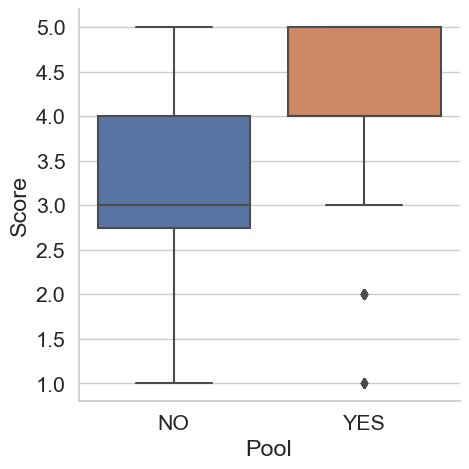

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.catplot(x='Pool',
           y='Score',
           data=reviews,
           kind='box')

## Bar plot

In [6]:
reviews['Traveler type'] = reviews['Traveler type'].astype('category')
reviews['Traveler type'].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

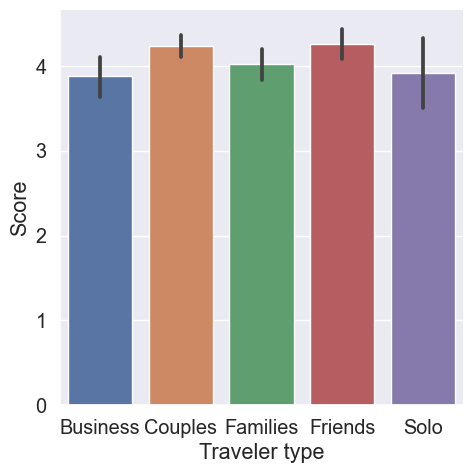

In [7]:
sns.set(font_scale=1.3)
sns.set_style('darkgrid')

sns.catplot(x='Traveler type',
           y='Score',
           data=reviews,
           kind='bar')

### The hue parameter
- used to split the data by a second category
- also used to color the graphic

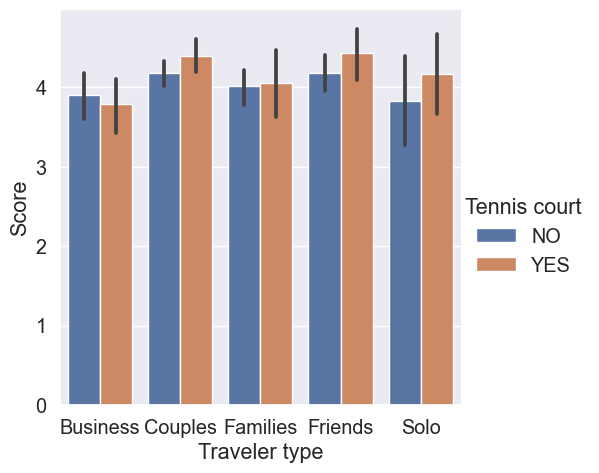

In [8]:
sns.catplot(x='Traveler type',
           y='Score',
           data=reviews,
           kind='bar',
           hue='Tennis court') #<-- hue parameter

## Point and count plots

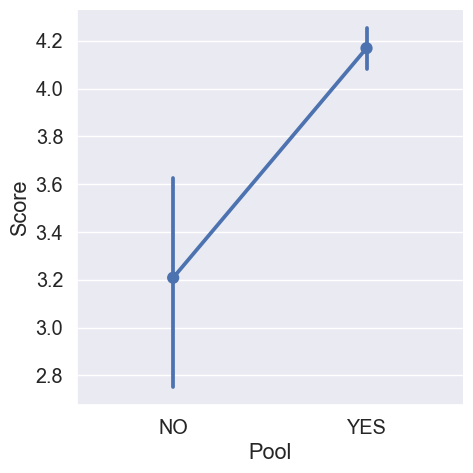

In [9]:
sns.catplot(x='Pool',y='Score',data=reviews,kind='point') 

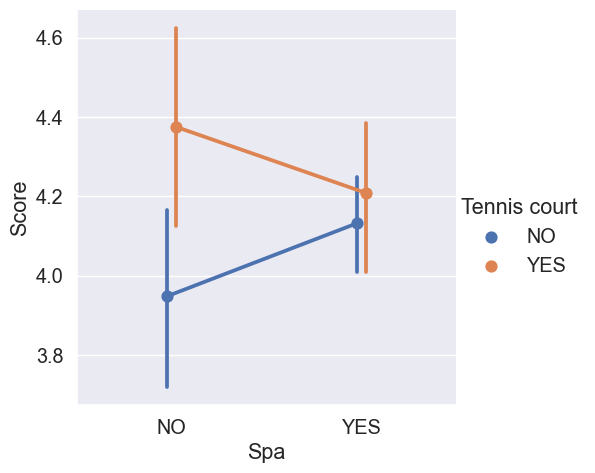

In [12]:
sns.catplot(x='Spa',
            y='Score',
            data=reviews,
            kind='point',
            hue='Tennis court', 
            dodge=True) #<- this offsets the lines so that they don't overlap

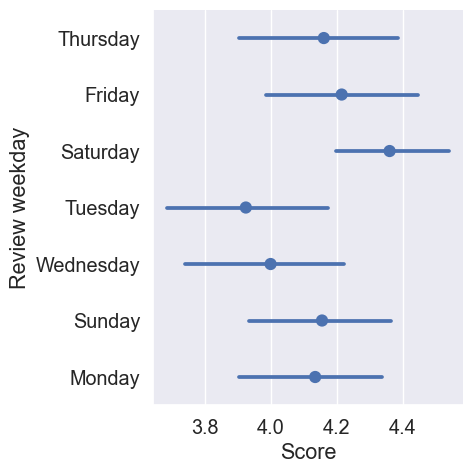

In [14]:
sns.catplot(x='Score',
           y='Review weekday',
           data=reviews,
           kind='point',
           join=False) #<-By setting join equal to false, the lines are no longer connected

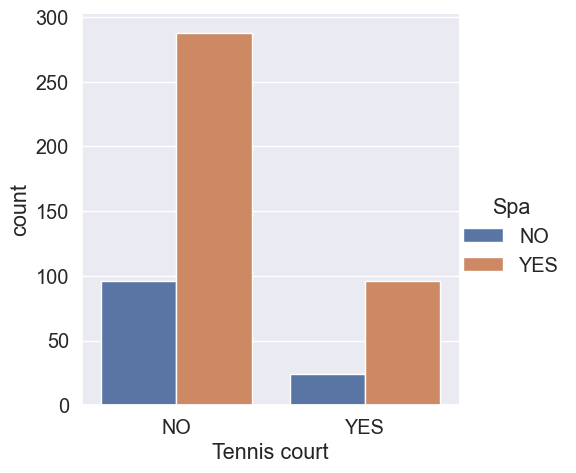

In [15]:
# count plot
sns.catplot(x='Tennis court',data=reviews,kind='count',hue='Spa')

## Additional catplot() options

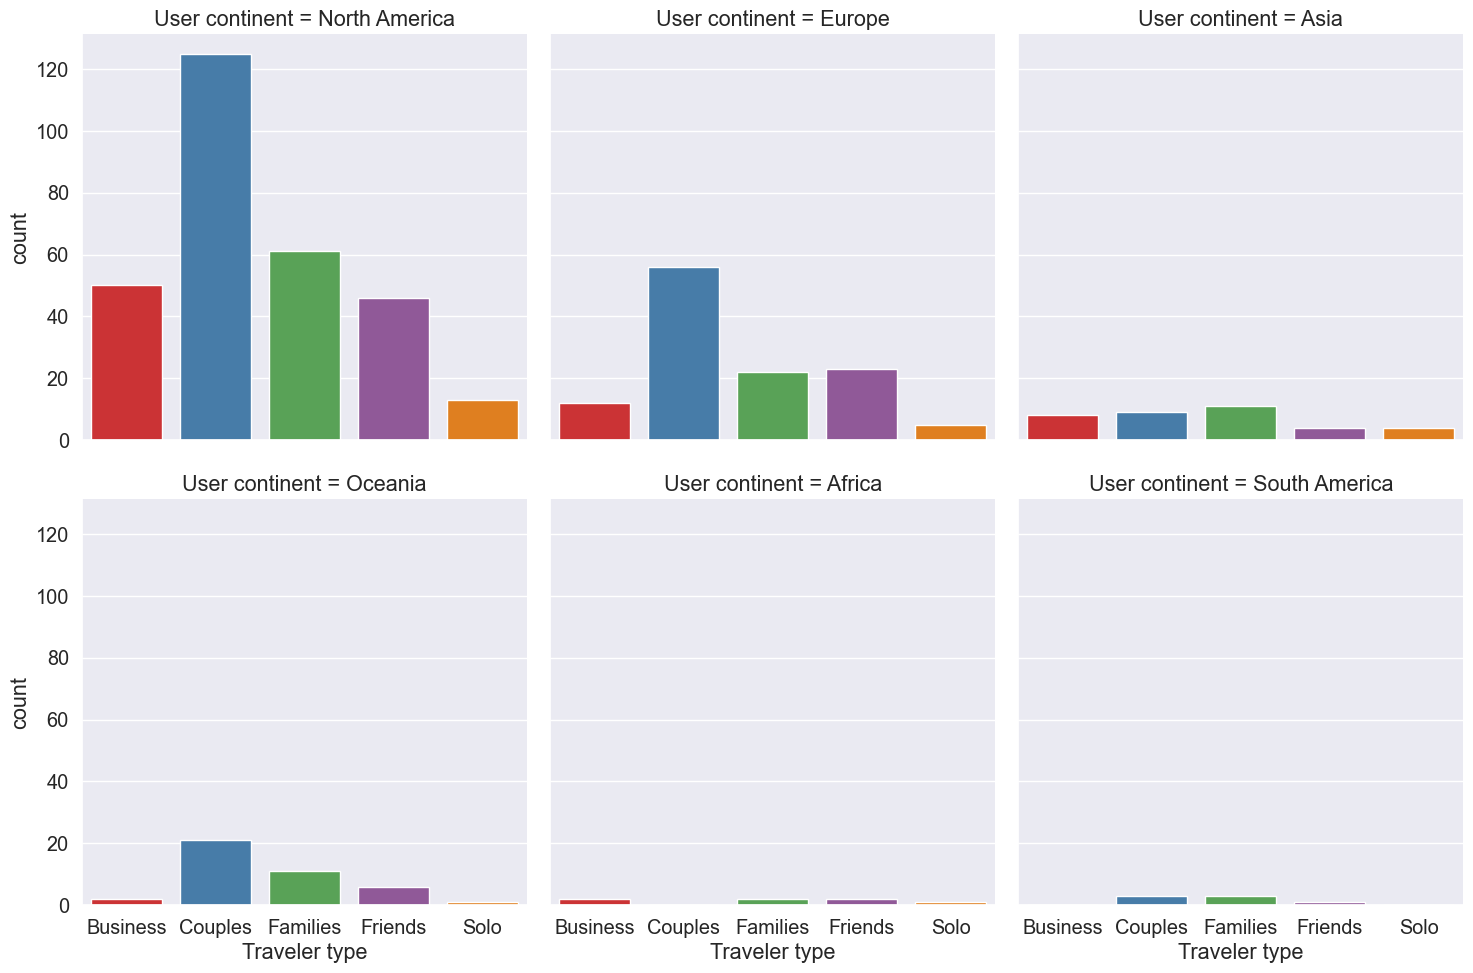

In [24]:
sns.catplot(x='Traveler type',
           kind='count',
           col='User continent', #<- create catplot of each category in user continent
           col_wrap=3, #<- 3 figures in a row
           palette=sns.color_palette('Set1'), 
           data=reviews
           ) 

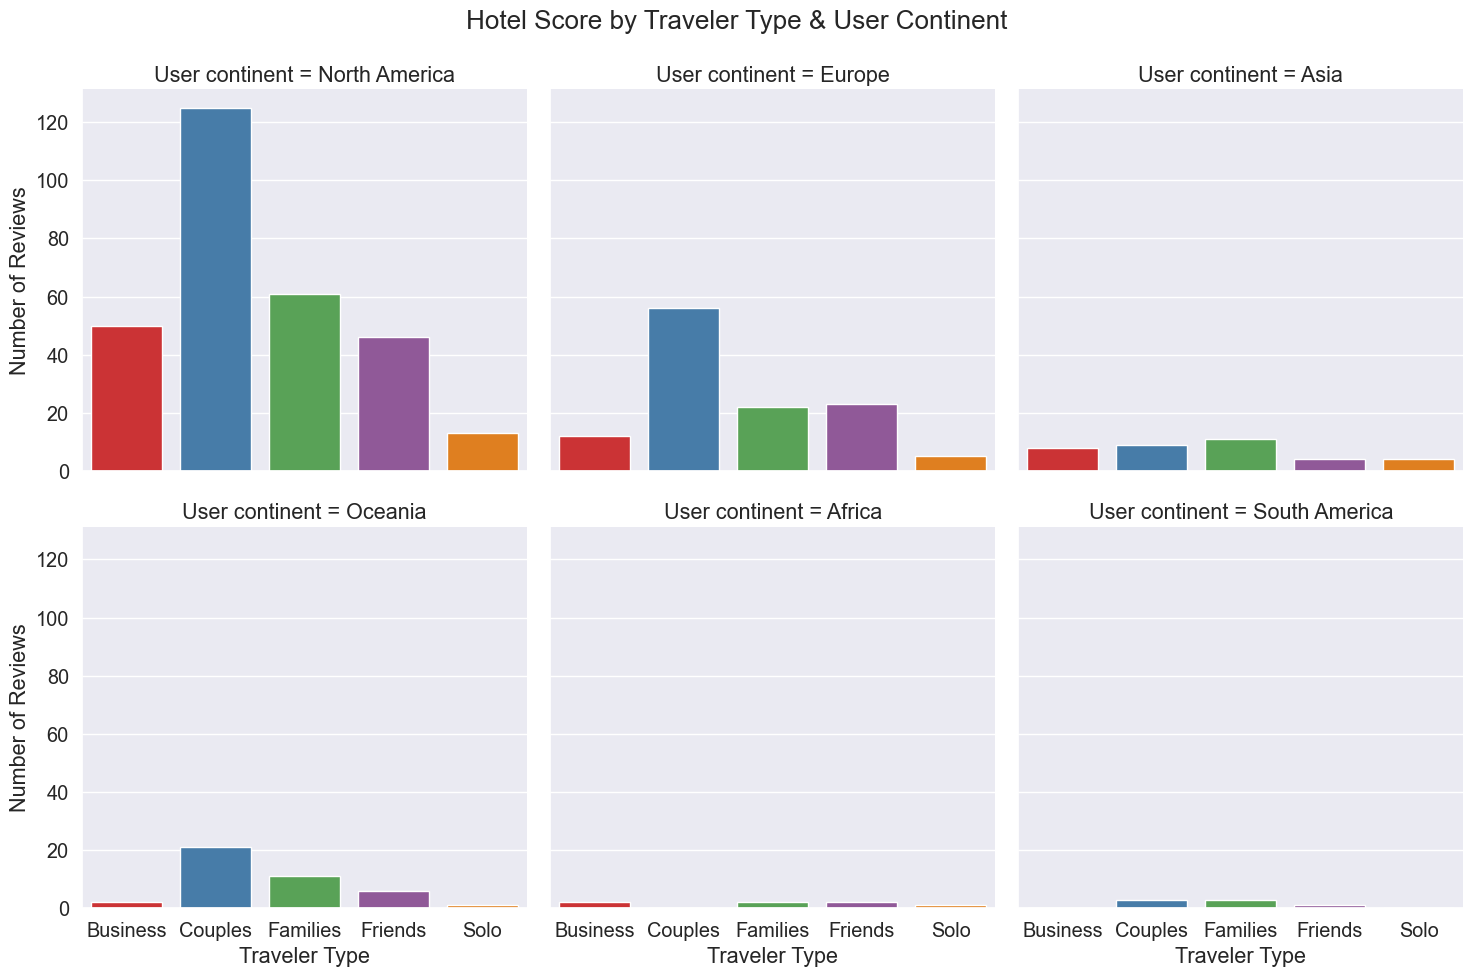

In [25]:
# updating plot
ax = sns.catplot(x='Traveler type',
           kind='count',
           col='User continent', #<- create catplot of each category in user continent
           col_wrap=3, #<- 3 figures in a row
           palette=sns.color_palette('Set1'), 
           data=reviews
           ) 

# Plot title
ax.fig.suptitle('Hotel Score by Traveler Type & User Continent')

# Axis labels
ax.set_axis_labels("Traveler Type", "Number of Reviews")

# Title height
plt.subplots_adjust(top=.9)

# Show the plot
plt.show()